<a href="https://colab.research.google.com/github/Ayanlola2002/Datalit/blob/master/%5BData_Lit%5D_Logistic_Regression_Ayanlowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding Logistic classifier 
the following links will be of help for begginners

1.   https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

2.   https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f

3.  https://becominghuman.ai/logistic-regression-in-python-from-scratch-954c0196d258
 
4.   https://www.kaggle.com/jeppbautista/logistic-regression-from-scratch-python


**Problem Objectives**

Our objective  here is to train a binary classifier on the us-data dataset to predict the column income_bracket which has two possible values “>50K” and “<=50K” and evaluate the accuracy of the classifier with the test dataset.

We would Apply sklearn model for prediction.as well as implementing logistic regression from scratch and get a good understanding of the key components of logistic regression:



> Ihypothesis function
> cost function
> decision boundary
>gradient descent algorithm

Finally,we would  compare the result gotten from built-in model versus implementation from scratch on various metrics.


DATA COLLECTION:

Follow the folowing links to know how to extract kaggle dataset using kaggle cli API and kaggle json file

[link text](https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235)



In [0]:
#Installing kaggle CLI to extract data from kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [0]:
#using the chmod commandline command to change the accessibility mode of kaggle json file
!chmod 600 /root/.kaggle/kaggle.json

In [134]:
#downloading us-data data sets from johnolafenwa kaggle page

!kaggle datasets download -d johnolafenwa/us-census-data

us-census-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#unzippig the us-data file
from shutil import unpack_archive
#unpack_archive('all.zip')
unpack_archive('us-census-data.zip')




In [0]:
#importing neccessary libraries for logistic classifier
import pandas as pd
import numpy as np

import scipy as sp
from scipy.stats import norm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.pylabtools import figsize

import warnings
warnings.filterwarnings('ignore')

EXPLORATORY DATA ANALYSIS

The us-data dataset is made up of categorical and continuous features. It also contains missing values.

The categorical columns are: workclass, education, marital_status, occupation, relationship, race, gender, native_country

The continuous columns are: age, education_num, capital_gain, capital_loss, hours_per_week,flnwgt

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights.

In [0]:
#Add Headings to dataset 
#we create a dictionary of all cols,categorical cols,continous varriable cols as

columns = ["age", "workclass", "fnlwgt", "education", "education_num", 
           "marital_status", "occupation", "relationship", "race", "gender", 
           "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_bracket"]

cat_cols = ["workclass", "education", "marital_status", "occupation","relationship", "race", "gender", "native_country"]
cont_cols = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

target_col_name = 'income_bracket'

In [0]:
train_data = pd.read_csv('adult-training.csv',names=columns)
test_data=pd.read_csv('adult-test.csv',names=columns,skiprows=1)

In [139]:
train_data.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [140]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [141]:
#showing the structure of data metadata i.e datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [142]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
gender            16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
income_bracket    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


The information about the data states that the data contains missing values.but all the features values seems to be non-null

we need to look into each features more closely.to check for irrational data values like ?,& etc

we start with the catagorical varriabes:work class,education



In [143]:
train_data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [144]:
train_data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [145]:
train_data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [146]:
train_data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [147]:

train_data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [148]:
train_data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [149]:
train_data['gender'].unique()

array([' Male', ' Female'], dtype=object)

In [150]:

train_data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [151]:
train_data['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

DATA CLEANING

we would replace all ? character with nan values

In [0]:
train_data.replace(' ?', np.nan, inplace=True)

In [0]:
test_data.replace(' ?',np.nan, inplace=True)

In [154]:
#checking for nulls values
train_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
dtype: int64

In [155]:
test_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
gender              0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income_bracket      0
dtype: int64

In [0]:

# Feature engineer the label
train_data['label'] = train_data[target_col_name].apply(lambda x: 1 if x == '>50K' else 0)



In [0]:
test_data['label'] = test_data[target_col_name].apply(lambda x: 1 if x == '>50K' else 0)

In [158]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [159]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,0


Data Visualization

Data Visualization is neccessary to get relationship between the features. we ll use the heat map,pair plot,distribution plots ,barplots to get the correlation between the labels representing target varriable (income target) and each other features 

The following links gives good solid backgrounds on understanding this plots


1.   https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8(very neccessary)

2.  https://www.kaggle.com/jiexus/feature-selection-and-data-visualization 


3.   https://towardsdatascience.com/analyzing-a-dataset-the-step1-of-machine-learning-which-often-gets-overlooked-415ca65ed2f1

4.  https://github.com/PacktPublishing/Feature-Engineering-Made-Easy/blob/master/Chapter02/Data%20EDA.ipynb






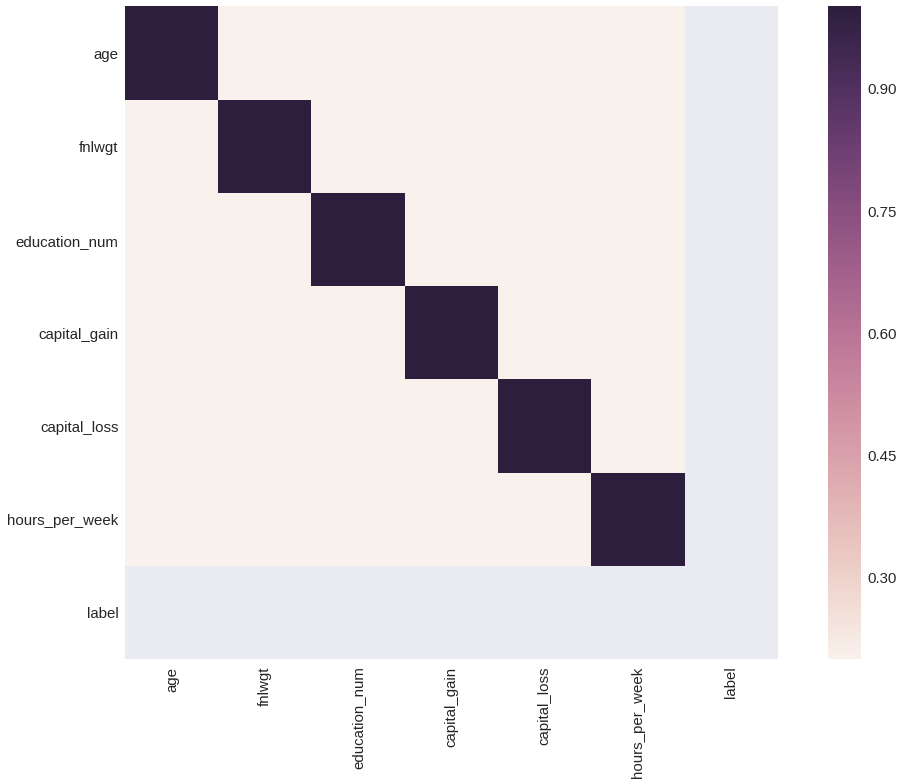

In [168]:

corr_matrix = train_data.corr(method='pearson')
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr_matrix, vmin=0.2, square=True)

In [0]:
largest_corrs = corr_matrix.nlargest(10, 'label')['label']


In [170]:
largest_corrs

Series([], Name: label, dtype: float64)

In [163]:
#determining the best correlation
best_corr_index = largest_corrs[1:5].index
best_corr_index

Index([], dtype='object')

In [164]:
#
cm = np.corrcoef(train_data[best_corr_index].values.T)
cm


array([], shape=(0, 0), dtype=float64)

In [165]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=best_corr_index.values, xticklabels=best_corr_index.values)
plt.show()

ValueError: ignored

In [0]:
#using  Scatterplot to create a 2 dimmensional relationship between two features
sns.set()
sns.pairplot(train_data[best_corr_index], size=3)
plt.show()

The above results shows from the heatmap the education_num is the most correlated followed by age.and from the the scatter plots 
very small number of people has large capital gain

In [0]:
#sketching a distrbution plots
figsize(16,8)
sns.distplot(train_data['age'], hist=True, bins=int(90/5), fit=norm)

The above plots for age shows that age is positively skewed.


In [0]:
figsize(16,8)
sns.distplot(train_data['capital_gain'], hist=True, bins=int(100000/5000), fit=norm)

In [0]:
train_data['capital_gain'][train_data['capital_gain'] > 80000].count()

In [0]:

figsize(16,8)
sns.distplot(train_data['education_num'], hist=True, fit=norm)

In [0]:
sns.barplot(x='education_num', y='label', data=train_data)

In [0]:
sns.barplot(x='workclass', y='label', data=train_data)

In [0]:
train_data['workclass'].value_counts()

Might be worth consolidating without-pay and never-worked - not much data for them

In [0]:
train_data['workclass'].isnull().sum()

In [0]:
sns.barplot(x='education', y='label', data=train_data)

In [0]:
train_data['workclass'].fillna(' 0', inplace=True)
test_data['workclass'].fillna(' 0', inplace=True)

Never-worked and Without-pay look very similar, we merge them.

In [0]:
train_data['workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test_data['workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

In [0]:
train_data['fnlwgt'] = train_data['fnlwgt'].apply(lambda x: np.log1p(x))
test_data['fnlwgt'] = test_data['fnlwgt'].apply(lambda x: np.log1p(x))

In [0]:
train_data['fnlwgt'].describe()

In [0]:
train_data['education'].value_counts()

Might be worth consolidating all the grade levels and preschool into "school"

In [0]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th','Preschool']:
        return ' school'
    else:
        return x

In [0]:
train_data['education'] = train_data['education'].apply(primary)
test_data['education'] = test_data['education'].apply(primary)

In [0]:

plt.xticks(rotation=50)
sns.barplot(x='occupation', y='label', data=train_data)

In [0]:
train_data['occupation'].value_counts()

Everything looks good, except Armed-Forces. They are similar to 0 and that's what we replace them with.

In [0]:
train_data['occupation'].fillna(' 0', inplace=True)
test_data['occupation'].fillna(' 0', inplace=True)

In [0]:
train_data['occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test_data['occupation'].replace(' Armed-Forces', ' 0', inplace=True)

There are very few Married-AF-spouse features. They are similar to Married-civ-spouse, so we can merge them.

In [0]:
train_data['marital_status'].value_counts()

In [0]:
train_data['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test_data['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

In [0]:
train_data['relationship'].value_counts()

In [0]:
train_data['race'].value_counts()

In [0]:
train_data['gender'].value_counts()

In [0]:
train_data['native_country'].value_counts()

In [0]:
train_data['native_country'].fillna(' 0', inplace=True)
test_data['native_country'].fillna(' 0', inplace=True)

Data Cleansing¶
Drop columns
Remove fnlwgt - although one might consider it an engineered feature.

Education seems represented by education_num


Regression

Split


Standardise / Scale features

Scikit Logistic Regression